In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression

In [61]:
# Ex 1
# Fit a model with 2 features (multiple linear regression)
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3], [2, 1], [3, 1]])
y = np.dot(X, np.array([1, 2])) + 3
# y = t0 + t1 * x1 + t2 * x2 (3 + 1 * x1 + 2 * x2)
reg = LinearRegression().fit(X, y)

In [62]:
# create a set of features linearly spaced + predict y for each combination
coefs = reg.coef_
intercept = reg.intercept_
xs = np.tile(np.linspace(0, 4, 30), (30,1))
ys = np.tile(np.linspace(0, 4, 30), (30,1)).T
zs = xs*coefs[0]+ys*coefs[1]+intercept

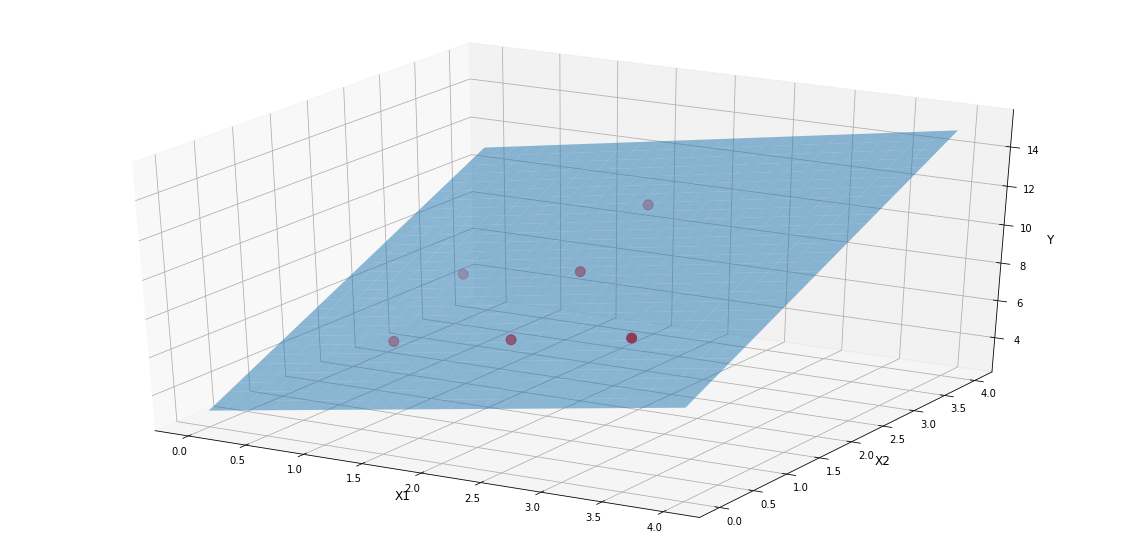

In [63]:
# plot results
fig = plt.figure(figsize=(20, 10))
ax = plt.axes(projection='3d')
ax.scatter3D(X[:,0], X[:,1], y, s=100, color="red")
ax.plot_surface(xs,ys,zs, alpha=0.5)
ax.set_xlabel('X1', fontsize=12)
ax.set_ylabel('X2', fontsize=12)
ax.set_zlabel('Y', fontsize=12)
plt.show()

Coefficients: 
 [938.23786125]


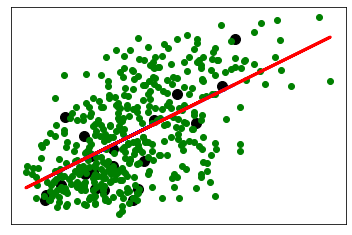

In [23]:
from sklearn import datasets, linear_model
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)
diabetes_y_train_pred = regr.predict(diabetes_X_train)

# The coefficients
print('Coefficients: \n', regr.coef_)

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black', s=100)
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.scatter(diabetes_X_train, diabetes_y_train, color='green')
plt.plot(diabetes_X_train, diabetes_y_train_pred, color='red', linewidth=3)
plt.xticks(())
plt.yticks(())

plt.show()

In [30]:
# Load data
df = pd.read_csv('data/train.csv', header=0)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [31]:
# train a linear regression model using all data. 
# warning: in practice, you want to split the training set into a train and test set and 
# fit a regressor on the train and then validate the fit using the test set
X = df['LotArea'].values.reshape(-1, 1)
y = df['SalePrice']
reg = LinearRegression().fit(X, y)

In [34]:
# predict the Sale price using the model from the previous cell for 100 LotArea values between the min and max LotArea in the training set.
# warning: linear regression is not always great at extrapolation! 
X_pred = np.linspace(df['LotArea'].min(), df['LotArea'].max(), 100).reshape(-1, 1)
y_pred = reg.predict(X_pred)

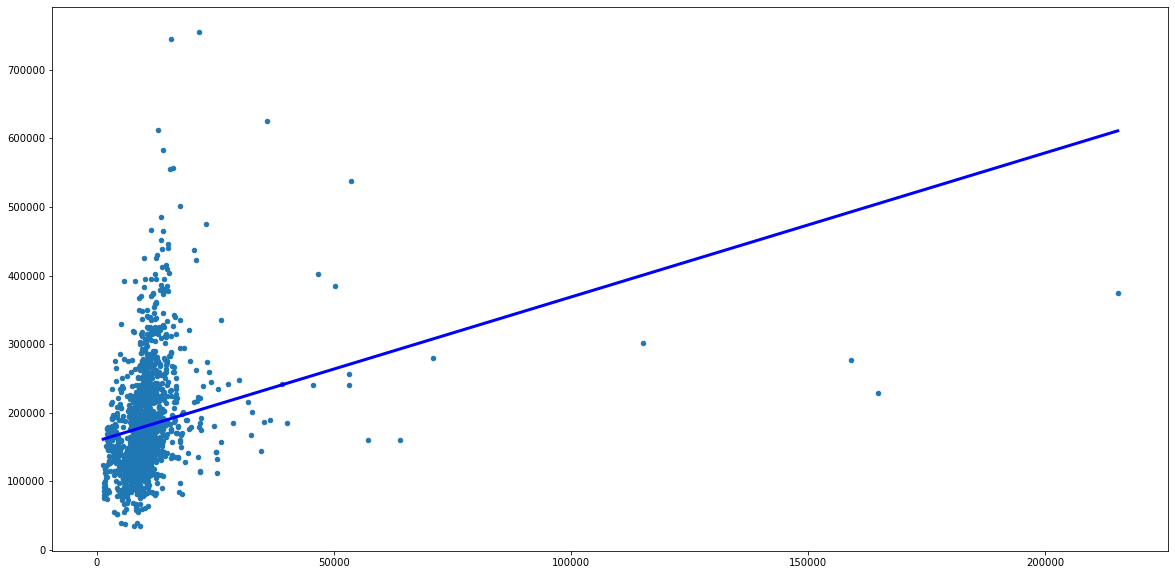

In [37]:
# plot the training data + model preditions
fig2 = plt.figure(figsize=(20,10))
plt.scatter(X, y, s=20)
plt.plot(X_pred, y_pred, color="blue", linewidth=3)
plt.show()